# Regression: Linear Models

Charity Woodrum <br/>
March 25, 2020

### Contents

1&nbsp; Regression for Linear Models <br/>
&nbsp;&nbsp; 1.1&nbsp; Multivariate Regression <br/>
&nbsp;&nbsp; 1.2&nbsp; Polynomial and Basis Function Regression <br/>
2&nbsp; Regularization and Penalizing the Likelihood <br/>
&nbsp;&nbsp; 2.2&nbsp; Ridge Regression <br/>
&nbsp;&nbsp; 2.3&nbsp; LASSO Regression <br/>
&nbsp;&nbsp; 2.4&nbsp; How Do We Choose the Regularization Parameter $\lambda$? <br/>
3&nbsp; Principal Component Regression <br/>
4&nbsp; Kernel Regression <br/>

## Introduction

### What is Regression

Regression is defined as the relation between a dependent variable, y, and a set of independent variables, x, that describes the expectation value of y given x (the conditional expectation value).
<br/><br/>
We can define several types of regression based on three different classification axes:
1. Linearity: when a parametric model is linear in all model parameters
2. Problem complexity: A large number of independent variables increases the complexity of the error covariance matrix, and can become a limiting factor in nonlinear regression.
3. Error behavior: The uncertainties in the values of independent and dependent variables, and their correlations, are the primary factor that determines which regression method to use

### Why Regression Models are Important in Astronomy

One of the best ways to answer this question is to introduce the dataset we will be using for this chapter. We will focus on the relation between the redshifts of supernovas and their luminosity distance (i.e., a cosmological parametrization of the expansion of the universe).

<img src="lecture12_files/expansion.png" width="400" />

### 1. Regression for Linear Models

Given an independent variable x and a dependent variable y, we consider the simplest case, a linear model:<br/>
$y_{i}=\theta_{0}+\theta_{1} x_{i}+\epsilon_{i}$
<br/><br/>
with the data likelihood as:<br/>
$p\left(\left\{y_{i}\right\} |\left\{x_{i}\right\}, \boldsymbol{\theta}, I\right)=\prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi} \sigma_{i}} \exp \left(\frac{-\left(y_{i}-\left(\theta_{0}+\theta_{1} x_{i}\right)\right)^{2}}{2 \sigma_{i}^{2}}\right)$
<br/><br/>
and the log-likelihood as:<br/>
$\ln (L) \equiv \ln \left(p\left(\boldsymbol{\theta} |\left\{x_{i}, y_{i}\right\}, I\right)\right) \propto \sum_{i=1}^{N}\left(\frac{-\left(y_{i}-\left(\theta_{0}+\theta_{1} x_{i}\right)\right)^{2}}{2 \sigma_{i}^{2}}\right)$
<br/><br/>
Maximizing the log-likelihood as a function of the model parameters, $\theta$, is achieved by minimizing the sum of the square errors. This observation dates back to the earliest applications of regression with the work of Gauss and Legendre, when the technique was introduced as the <b>method of least squares</b>.

Let's introduce this in matrix notation, which will be used later.
$Y=M\theta$
<br/><br/>
where Y is <br/><br/>
$Y=\left[\begin{array}{c}
y_{0} \\
y_{1} \\
y_{2} \\
\cdot \\
y_{N-1}
\end{array}\right]$

For our straight-line regression function, $\theta$ is a two-dimensional vector of regression coefficients,

$\boldsymbol{\theta}=\left[\begin{array}{l}
\theta_{0} \\
\theta_{1}
\end{array}\right]$

and M is a 2 X N matrix,

$M=\left[\begin{array}{cc}
1 & x_{0} \\
1 & x_{1} \\
1 & x_{2} \\
\cdot & \cdot \\
1 & x_{N-1}
\end{array}\right]$

For the case of heteroscedastic uncertainties, we define a covariance matrix, C, as an N × N matrix,

$C=\left[\begin{array}{cccc}
\sigma_{0}^{2} & 0 & . & 0 \\
0 & \sigma_{1}^{2} & . & 0 \\
. & . & . & . \\
0 & 0 & . & \sigma_{N-1}^{2}
\end{array}\right]$

The maximum likelihood solution for this regression is,
<br/>
$\boldsymbol{\theta}=\left(M^{T} C^{-1} M\right)^{-1}\left(M^{T} C^{-1} Y\right)$
<br/><br/>
which again minimizes the sum of the square errors,
<br/>
$(Y-\theta M)^{T} C^{-1}(Y-\theta M)$

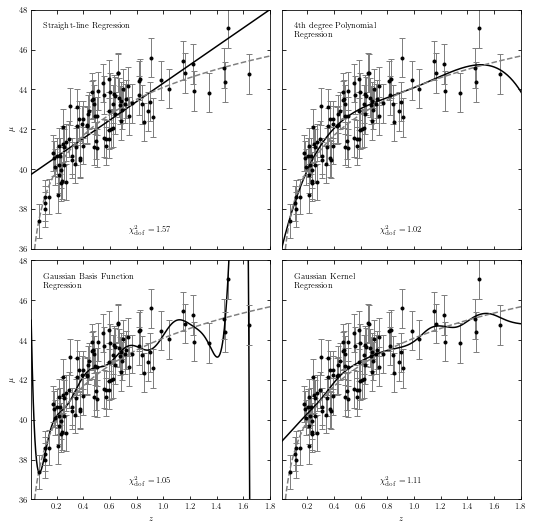

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import LambdaCDM
from astroML.datasets import generate_mu_z
from astroML.linear_model import (LinearRegression, PolynomialRegression,
                                  BasisFunctionRegression, NadarayaWatson)

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)
z = np.linspace(0.01, 2, 1000)
mu_true = cosmo.distmod(z)

#------------------------------------------------------------
# Define our classifiers
basis_mu = np.linspace(0, 2, 15)[:, None]
basis_sigma = 3 * (basis_mu[1] - basis_mu[0])

subplots = [221, 222, 223, 224]
classifiers = [LinearRegression(),
               PolynomialRegression(4),
               BasisFunctionRegression('gaussian',
                                       mu=basis_mu, sigma=basis_sigma),
               NadarayaWatson('gaussian', h=0.1)]
text = ['Straight-line Regression',
        '4th degree Polynomial\n Regression',
        'Gaussian Basis Function\n Regression',
        'Gaussian Kernel\n Regression']
# number of constraints of the model.  Because
# Nadaraya-watson is just a weighted mean, it has only one constraint
n_constraints = [2, 5, len(basis_mu) + 1, 1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(subplots[i])
    # fit the data
    clf = classifiers[i]
    clf.fit(z_sample[:, None], mu_sample, dmu)
    mu_sample_fit = clf.predict(z_sample[:, None])
    mu_fit = clf.predict(z[:, None])
    chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
                / (len(mu_sample) - n_constraints[i]))
    ax.plot(z, mu_fit, '-k')
    ax.plot(z, mu_true, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    ax.text(0.5, 0.05, r"$\chi^2_{\rm dof} = %.2f$" % chi2_dof,
            ha='center', va='bottom', transform=ax.transAxes)
    ax.set_xlim(0.01, 1.8)
    ax.set_ylim(36.01, 48)
    ax.text(0.05, 0.95, text[i], ha='left', va='top',
            transform=ax.transAxes)
    if i in (0, 2):
        ax.set_ylabel(r'$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    if i in (2, 3):
        ax.set_xlabel(r'$z$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

### 1.1 Multivariate Regression

For multivariate data (where we fit a hyperplane rather than a straight line) we simply extend the description of the regression function to multiple dimensions, with $y=f (x|\theta)$ given by: <br/>

$y_{i}=\theta_{0}+\theta_{1} x_{i 1}+\theta_{2} x_{i 2}+\cdots+\theta_{k} x_{i k}+\epsilon_{i}$
<br/><br/>
<video controls src="lecture12_files/FundamentalPlane.mp4" width=500/>

### 2.1 Ridge Regression

Earlier we showed the equation for minimizing least squares as,
<br/>
$(Y-\theta M)^{T} C^{-1}(Y-\theta M)$
<br/>
We can impose a penalty on this minimization if we include a regularization term,
<br/>
$(Y-M \boldsymbol{\theta})^{T} C^{-1}(Y-M \boldsymbol{\theta})-\lambda\left|\boldsymbol{\theta}^{T} \boldsymbol{\theta}\right|^{2}$
<br/>
where $\lambda$ is the regularization or smoothing parameter and $\left|\boldsymbol{\theta}^{T} \boldsymbol{\theta}\right|^{2}$ is an example of the penalty function. For ridge regression, we penalize the size of the regression coefficients.
<br/>
Solving for $\theta$,
<br/>
$\boldsymbol{\theta}=\left(M^{T} C^{-1} M+\lambda I\right)^{-1}\left(M^{T} C^{-1} Y\right)$
<br/>
By suppressing large regression coefficients this penalty limits the variance of the system at the expense of an increase in the bias of the derived coefficients. The larger the regularization parameter $\lambda$ the more the regression coefficients are driven toward zero.

### 2.2 LASSO Regression

A modification of this approach is to use the L1 norm to subset the variables within a model as well as applying shrinkage. This technique is known as LASSO (least absolute shrinkage and selection. LASSO penalizes the likelihood as
<br/><br/>
$(Y-M \theta)^{T}(Y-M \theta)-\lambda|\theta|$
where $|\theta|$ penalizes the absolute value of $\theta$.
<br/><br/>
LASSO regularization is equivalent to least-squares regression with a penalty on the absolute value of the regression coefficients. The most interesting aspect of LASSO is that it not only weights the regression coefficients, it also imposes sparsity on the regression model.

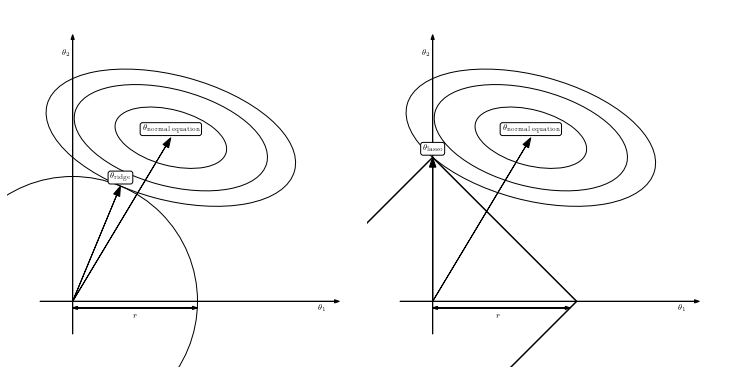

In [7]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse, Circle, RegularPolygon

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots

#------------------------------------------------------------
# Set up figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

#------------------------------------------------------------
# plot ridge diagram
ax = fig.add_axes([0, 0, 0.5, 1], frameon=False, xticks=[], yticks=[])

# plot the axes
ax.arrow(-1, 0, 9, 0, head_width=0.1, fc='k')
ax.arrow(0, -1, 0, 9, head_width=0.1, fc='k')

# plot the ellipses and circles
for i in range(3):
    ax.add_patch(Ellipse((3, 5),
                         3.5 * np.sqrt(2 * i + 1), 1.7 * np.sqrt(2 * i + 1),
                         -15, fc='none'))

ax.add_patch(Circle((0, 0), 3.815, fc='none'))

# plot arrows
ax.arrow(0, 0, 1.46, 3.52, head_width=0.2, fc='k',
         length_includes_head=True)
ax.arrow(0, 0, 3, 5, head_width=0.2, fc='k',
         length_includes_head=True)
ax.arrow(0, -0.2, 3.81, 0, head_width=0.1, fc='k',
         length_includes_head=True)
ax.arrow(3.81, -0.2, -3.81, 0, head_width=0.1, fc='k',
         length_includes_head=True)

# annotate with text
ax.text(7.5, -0.1, r'$\theta_1$', va='top')
ax.text(-0.1, 7.5, r'$\theta_2$', ha='right')
ax.text(3, 5 + 0.2, r'$\rm \theta_{normal\ equation}$',
        ha='center', bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(1.46, 3.52 + 0.2, r'$\rm \theta_{ridge}$', ha='center',
        bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(1.9, -0.3, r'$r$', ha='center', va='top')

ax.set_xlim(-2, 9)
ax.set_ylim(-2, 9)

#------------------------------------------------------------
# plot lasso diagram
ax = fig.add_axes([0.5, 0, 0.5, 1], frameon=False, xticks=[], yticks=[])

# plot axes
ax.arrow(-1, 0, 9, 0, head_width=0.1, fc='k')
ax.arrow(0, -1, 0, 9, head_width=0.1, fc='k')

# plot ellipses and circles
for i in range(3):
    ax.add_patch(Ellipse((3, 5),
                         3.5 * np.sqrt(2 * i + 1), 1.7 * np.sqrt(2 * i + 1),
                         -15, fc='none'))

# this is producing some weird results on save
#ax.add_patch(RegularPolygon((0, 0), 4, 4.4, np.pi, fc='none'))
ax.plot([-4.4, 0, 4.4, 0, -4.4], [0, 4.4, 0, -4.4, 0], '-k')

# plot arrows
ax.arrow(0, 0, 0, 4.4, head_width=0.2, fc='k', length_includes_head=True)
ax.arrow(0, 0, 3, 5, head_width=0.2, fc='k', length_includes_head=True)
ax.arrow(0, -0.2, 4.2, 0, head_width=0.1, fc='k', length_includes_head=True)
ax.arrow(4.2, -0.2, -4.2, 0, head_width=0.1, fc='k', length_includes_head=True)

# annotate plot
ax.text(7.5, -0.1, r'$\theta_1$', va='top')
ax.text(-0.1, 7.5, r'$\theta_2$', ha='right')
ax.text(3, 5 + 0.2, r'$\rm \theta_{normal\ equation}$',
        ha='center', bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(0, 4.4 + 0.2, r'$\rm \theta_{lasso}$', ha='center',
        bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(2, -0.3, r'$r$', ha='center', va='top')

ax.set_xlim(-2, 9)
ax.set_ylim(-2, 9)

plt.show()

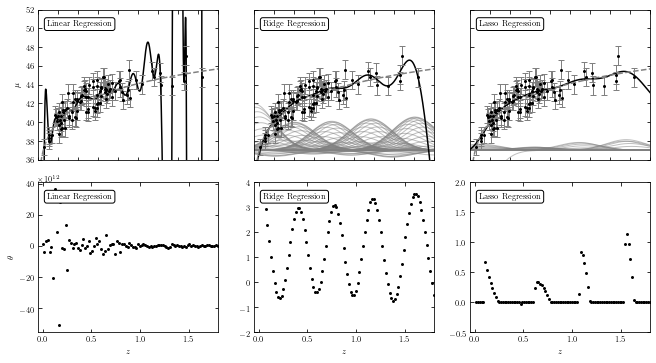

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import LambdaCDM

from astroML.linear_model import LinearRegression
from astroML.datasets import generate_mu_z

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# generate data
np.random.seed(0)

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)
cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)

z = np.linspace(0.01, 2, 1000)
mu = cosmo.distmod(z).value


#------------------------------------------------------------
# Manually convert data to a gaussian basis
#  note that we're ignoring errors here, for the sake of example.
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)


centers = np.linspace(0, 1.8, 100)
widths = 0.2
X = gaussian_basis(z_sample[:, np.newaxis], centers, widths)

#------------------------------------------------------------
# Set up the figure to plot the results
fig = plt.figure(figsize=(10, 5.4))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.12, top=0.95,
                    hspace=0.15, wspace=0.2)

regularization = ['none', 'l2', 'l1']
kwargs = [dict(), dict(alpha=0.005), dict(alpha=0.001)]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

for i in range(3):
    clf = LinearRegression(regularization=regularization[i],
                           fit_intercept=True, kwds=kwargs[i])
    clf.fit(X, mu_sample, dmu)
    w = clf.coef_[1:]
    fit = clf.predict(gaussian_basis(z[:, None], centers, widths))

    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        curves = 37 + w * gaussian_basis(z[:, np.newaxis], centers, widths)
        curves = curves[:, abs(w) > 0.01]
        ax.plot(z, curves,
                c='gray', lw=1, alpha=0.5)

    ax.plot(z, fit, '-k')
    ax.plot(z, mu, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, ms=4)
    ax.set_xlim(0.001, 1.8)
    ax.set_ylim(36, 52)
    ax.text(0.05, 0.93, labels[i],
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$z$')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(-0.05, 1.8)

    if i == 1:
        ax.set_ylim(-2, 4)
    elif i == 2:
        ax.set_ylim(-0.5, 2)

    ax.text(0.05, 0.93, labels[i],
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

plt.show()

### 2.3 How Do We Choose the Regularization Parameter $\lambda$? 

The natural question then is how do we set $\lambda$? So far we have only noted that as we increase $\lambda$ we increase the constraints on the range regression coefficients (with $\lambda=0$ returning the standard least-squares
regression).
<br/><br/>
Applying the k-fold cross-validation techniques (see section 8.11 of the book) we can define an error (for a specified value of $\lambda$) as
<br/><br/>
$\operatorname{Error}(\lambda)=k^{-1} \sum_{k} N_{k}^{-1} \sum_{i}^{N_{k}} \frac{\left[y_{i}-f\left(x_{i} | \boldsymbol{\theta}\right)\right]^{2}}{\sigma_{i}^{2}}$

where $N_{k}^{-1}$ is the number of data points in the kth cross-validation sample, and the summation over $N_k$ represents the sum of the squares of the residuals of the fit. Estimating $\lambda$ is then simply a case of finding the $\lambda$ that minimizes the cross-validation error.

### Which Method Should I Use?

Here's a table from the book:
![alt](lecture12_files/Table8p1.png)